<a href="https://colab.research.google.com/github/lookee/seir-model/blob/master/malaria_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MALARIA MODEL

*A hands-on SEIR modeling sandbox for epidemic learning, teaching, and rapid experimentation*

[![Python](https://img.shields.io/badge/python-3.8%2B-blue)]()
[![Jupyter](https://img.shields.io/badge/Jupyter-Notebook-orange)]()
[![License: GPL v3](https://img.shields.io/badge/license-GPLv3-green.svg)]()

[Luca Amore](https://www.lucaamore.com)  
[Blog post about this project](https://www.lucaamore.com/?p=1023)

[Github project](https://github.com/lookee/seir-model)

Based on the article:

[Modeling How Infectious Diseases like Coronavirus Spread](https://triplebyte.com/blog/modeling-infectious-diseases) by Jennifer Ciarochi

![COVID-19](https://github.com/lookee/seir-model/blob/master/img/seir-simulation-luke.png?raw=true)

In [1]:
########################################
### MALARIA PARAMETERS
########################################

bites_per_day_and_mosquito = 0.1 # 1 / (day * mosquito)
transmission_probability_mosquito_to_human = 0.3 # probability
transmission_probability_human_to_mosquito = 0.5 # probability
human_recovery_time = 70.0 # days
mosquito_lifetime = 10.0 # days
bite_reduction_by_net = 0.9 # probability
h = 1. # day

# MALARIA VIRUS MODEL
def virus (infected_humans, infected_mosquitoes ,t):

  # basic virus model
  net_factor = 1.0

  if t * h >= 100.:   # after 100 days, the net_factor will be reduced by bites_reduction_by_net
    net_factor = 1.0 - bite_reduction_by_net

  human_health_rate = (total_humans-infected_humans)/total_humans
  mosquitoes_health_rate = (total_mosquitoes - infected_mosquitoes) / total_humans

  d_infected_humans = \
    + h * (net_factor * bites_per_day_and_mosquito * infected_mosquitoes * human_health_rate * transmission_probability_mosquito_to_human \
    - 1.0 / human_recovery_time * infected_humans)

  d_infected_mosquitoes = \
    + h * (net_factor * bites_per_day_and_mosquito * infected_humans * mosquitoes_health_rate * transmission_probability_human_to_mosquito \
    - 1.0 / mosquito_lifetime * infected_mosquitoes)

  return (d_infected_humans, d_infected_mosquitoes)

In [2]:
###################################
# MALARIA STARTING CONDITIONS
###################################

total_humans = 1e8
total_mosquitoes = 1e10
start_infected_humans = 0
start_infected_mosquitoes = 1e6

# days of simulation (h = 1)
days = 400

In [3]:
###################################
# SIMULATOR
###################################

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# virus model wrapper
def model(x,t):
  (infected_humans, infected_mosquitoes) = (x[0], x[1]);
  return virus(infected_humans, infected_mosquitoes, t)

# differential equations system solver
t = np.linspace(0, days, days)
x0 = [start_infected_humans, start_infected_mosquitoes]
x = odeint(model, x0, t)

# series
(infected_humans, infected_mosquitoes) = (x[:,0], x[:,1])

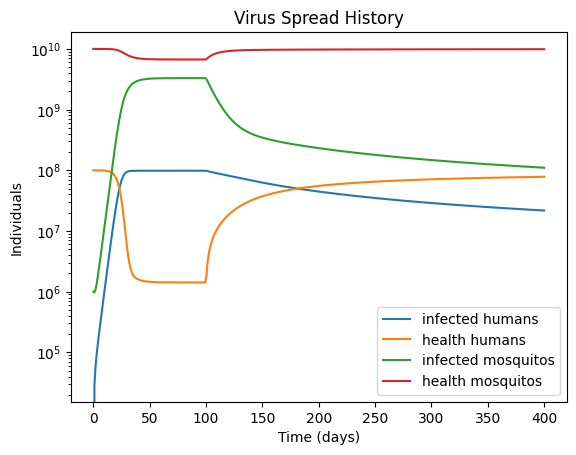

In [4]:
###################################
# VIRUS SPREAD HISTORY
###################################

plt.semilogy(t,infected_humans, label='infected humans')
plt.semilogy(t,total_humans - infected_humans, label='health humans')
plt.semilogy(t,infected_mosquitoes, label='infected mosquitos')
plt.semilogy(t,total_mosquitoes - infected_mosquitoes, label='health mosquitos')
plt.title("Virus Spread History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

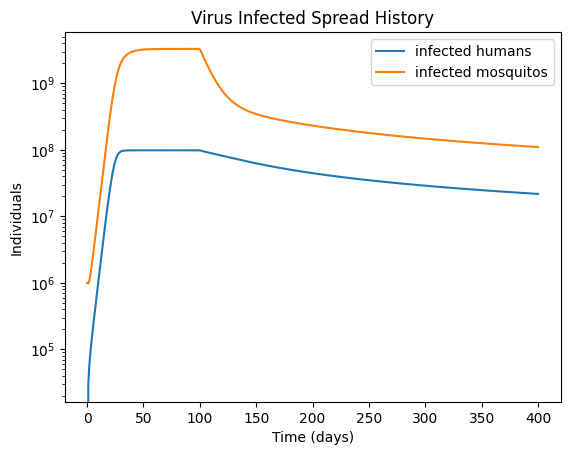

In [5]:
###################################
# INFECTED SPREAD HISTORY
###################################

plt.semilogy(t,infected_humans, label='infected humans')
plt.semilogy(t,infected_mosquitoes, label='infected mosquitos')
plt.title("Virus Infected Spread History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

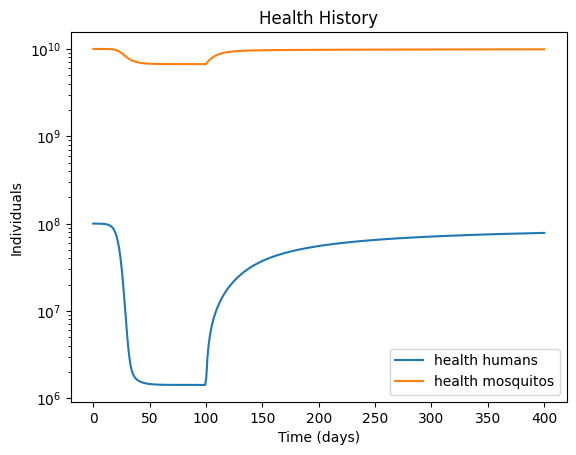

In [6]:
###################################
# HEALTH HISTORY
###################################
plt.semilogy(t,total_humans - infected_humans, label='health humans')
plt.semilogy(t,total_mosquitoes - infected_mosquitoes, label='health mosquitos')
plt.title("Health History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

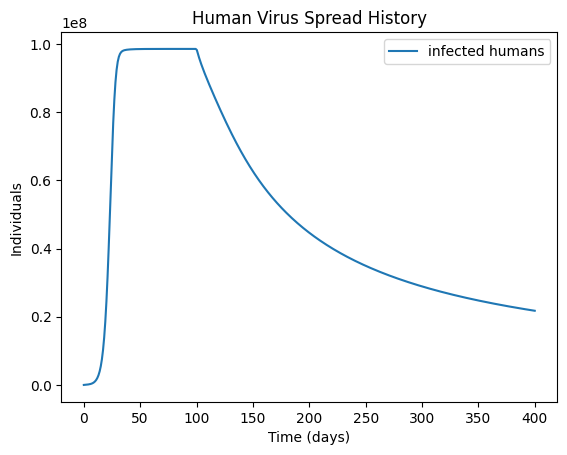

In [7]:
###################################
# HUMAN VIRUS SPREAD HISTORY
###################################

plt.plot(t,infected_humans, label='infected humans')
plt.title("Human Virus Spread History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

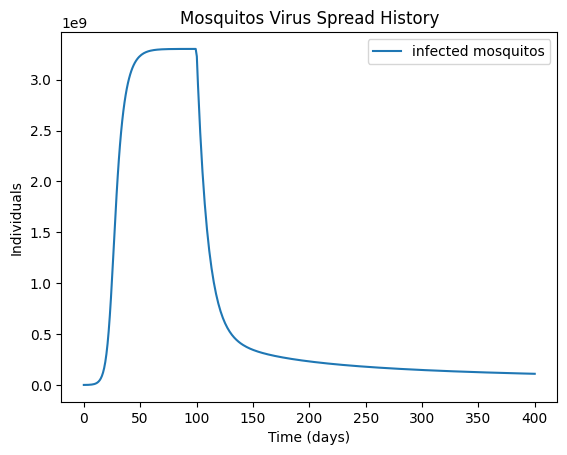

In [8]:
###################################
# MOSQUITOES VIRUS SPREAD HISTORY
###################################

plt.plot(t,infected_mosquitoes, label='infected mosquitos')
plt.title("Mosquitos Virus Spread History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

In [9]:
##############################################################################
#    Copyright (C) 2020 Luca Amore <luca.amore at gmail.com>
#
#    Virus Spread Simulator Construction Kit
#    is free software: you can redistribute it and/or modify
#    it under the terms of the GNU General Public License as published by
#    the Free Software Foundation, either version 3 of the License, or
#    (at your option) any later version.
#
#    frk is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#    GNU General Public License for more details.
#
#    You should have received a copy of the GNU General Public License
#    along with frk.  If not, see <http://www.gnu.org/licenses/>.
##############################################################################